In [1]:
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

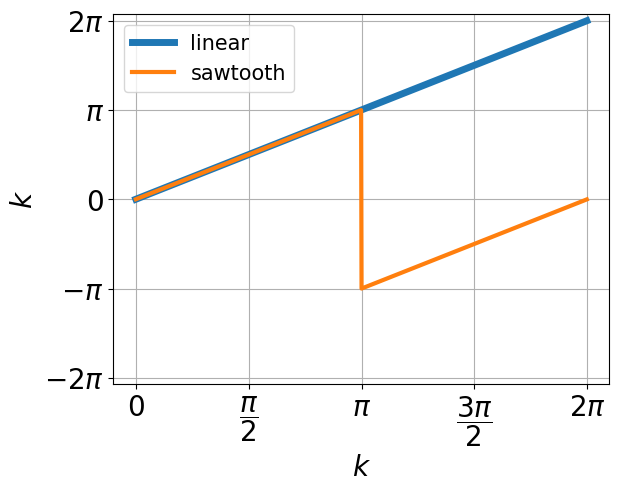

In [2]:
# Example of k with sawtooth shape

dx = 1
N = 1000

# DO NOT USE LINSPACE TO DRAW THE K ARRAY
k_linear = np.linspace(0, 2*np.pi/dx, N, endpoint=False)

# ALWAYS USE THE FFTFREQ TO GET THE SAWTOOTH SHAPE AUTOMATICALLY
k_sawtooth = fft.fftfreq(N)*2*np.pi/dx

plt.plot(k_linear, k_linear, lw=5, label='linear')
plt.plot(k_linear, k_sawtooth, lw=3, label='sawtooth')
plt.legend(fontsize=15)
plt.grid()
plt.ylim(-6.5,6.5)

plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], 
           ["0", R"$\dfrac{\pi}{2}$", R"$\pi$", R"$\dfrac{3\pi}{2}$", R"$2\pi$"])

plt.yticks([-2*np.pi, -np.pi, 0, np.pi, 2*np.pi], 
           [R"$-2\pi$", R"$-\pi$", "0", R"$\pi$", R"$2\pi$"])

plt.xlabel(r'$k$')
plt.ylabel(r'$k$')
plt.show()

## Example 1: sin(x) and cos(x)

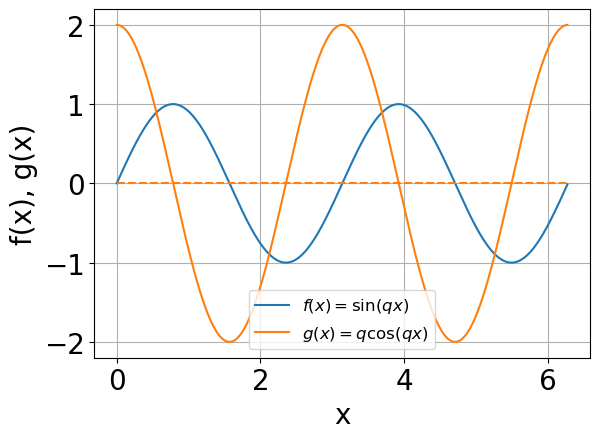

In [3]:
N = 1000
L = 2*np.pi
q = 2
dx = L/N

x = np.linspace(0, L, N, endpoint=False)
k = fft.fftfreq(N)*2*np.pi/dx

fx = np.sin(q*x)
Fk = fft.fft(fx)
Gk = 1j*k*Fk
gx = fft.ifft(Gk)

plt.plot(x, fx, label=r'$f(x)=\sin(qx)$')
plt.plot(x, gx.real, label=r'$g(x)=q\cos(qx)$')
plt.plot(x, gx.imag, c='C1', ls='--')
plt.xlabel('x')
plt.ylabel('f(x), g(x)')
plt.legend(fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()

In [4]:
print('Expected intensity:', np.sqrt(2*np.pi)/2)

Expected intensity: 1.2533141373155001


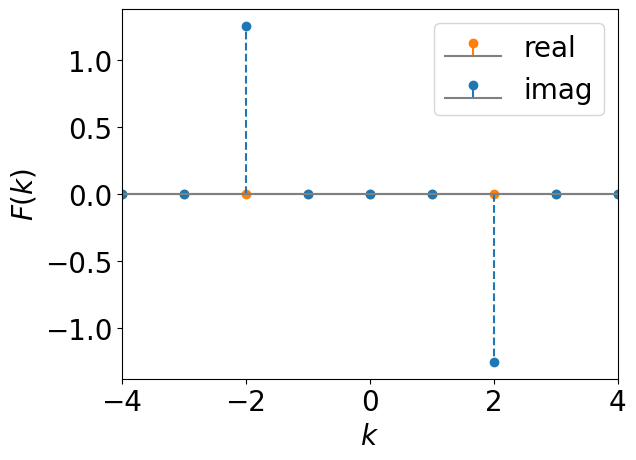

In [5]:
# to get the correct intensity, we need to fix the norm
# we don't need to fix the phase, since we are using a=k0=0 here
norm = dx/np.sqrt(2*np.pi)

plt.stem(k, norm*np.real(Fk), linefmt='C1--', basefmt='gray', markerfmt='C1o', label='real')
plt.stem(k, norm*np.imag(Fk), linefmt='C0--', basefmt='gray', markerfmt='C0o', label='imag')
plt.legend()
plt.xlim(-4,4)
plt.xlabel(r'$k$')
plt.ylabel(r'$F(k)$')
plt.show()

## Example 2: gaussian

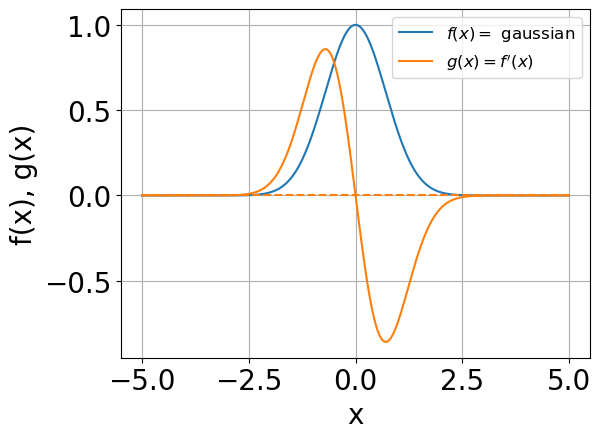

In [6]:
N = 1000
L = 10
dx = L/N

x = np.linspace(-L/2, L/2, N, endpoint=False)
k = fft.fftfreq(N)*2*np.pi/dx

fx = np.exp(-x**2)
Fk = fft.fft(fx)
Gk = 1j*k*Fk
gx = fft.ifft(Gk)

plt.plot(x, fx, label=r'$f(x)=$ gaussian')
plt.plot(x, gx.real, label=r'$g(x)=f^\prime(x)$')
plt.plot(x, gx.imag, c='C1', ls='--')
plt.xlabel('x')
plt.ylabel('f(x), g(x)')
plt.legend(fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()

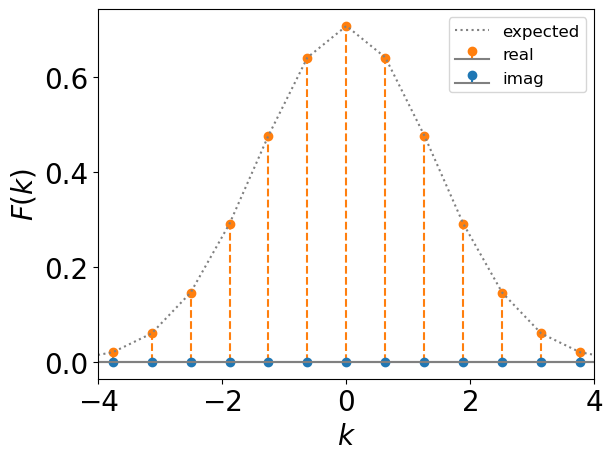

In [7]:
# to get the correct intensity, we need to fix the norm
# since a=L/2, we need to fix the phase here
norm = dx/np.sqrt(2*np.pi)
phase = np.exp(1j*(-L/2)*k)

expected = np.exp(-k**2/4)/np.sqrt(2)

plt.stem(k, norm*np.real(Fk*phase), linefmt='C1--', basefmt='gray', markerfmt='C1o', label='real')
plt.stem(k, norm*np.imag(Fk*phase), linefmt='C0--', basefmt='gray', markerfmt='C0o', label='imag')
plt.plot(fft.fftshift(k), fft.fftshift(expected), ls=':', c='grey', label='expected')
plt.legend(fontsize=12)
plt.xlim(-4,4)
plt.xlabel(r'$k$')
plt.ylabel(r'$F(k)$')
plt.show()

## Example 3: convolutions

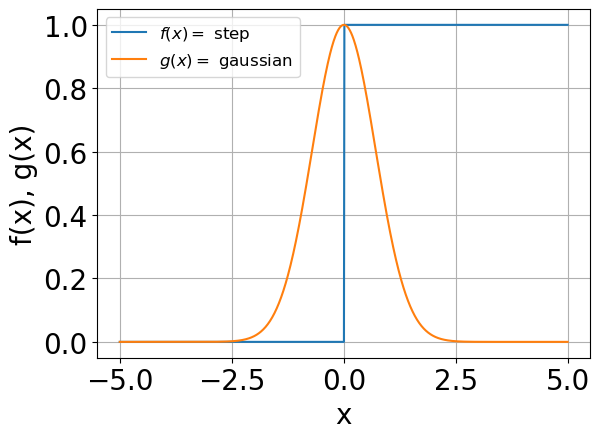

In [8]:
N = 1000
L = 10
q = 2
dx = L/N

x = np.linspace(-L/2, L/2, N, endpoint=False)
k = fft.fftfreq(N)*2*np.pi/dx

fx = np.heaviside(x, 0)
gx = np.exp(-x**2)

plt.plot(x, fx, label=r'$f(x)=$ step')
plt.plot(x, gx, label=r'$g(x)=$ gaussian')
plt.xlabel('x')
plt.ylabel('f(x), g(x)')
plt.legend(fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()

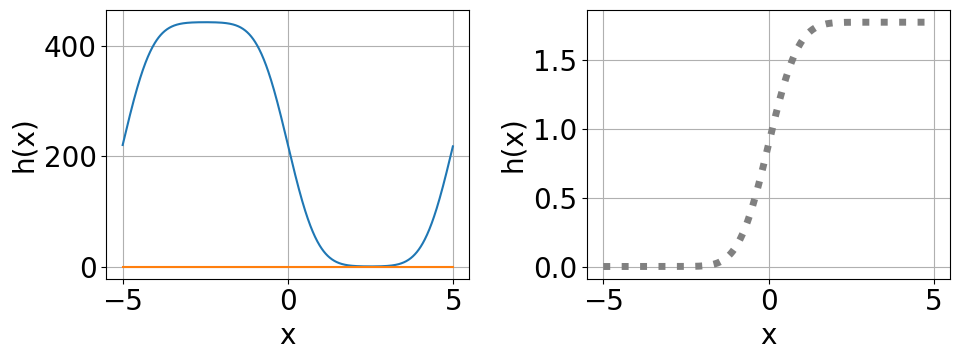

In [9]:
# if we don't fix the norm and phase, the result is wrong!

Fk = fft.fft(fx)
Gk = fft.fft(gx)
Hk = np.sqrt(2*np.pi) * Fk * Gk
hx = fft.ifft(Hk)

# import error function from scipy
from scipy.special import erf
expected = (np.sqrt(np.pi)/2)*(1+erf(x))

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(x, hx.real, label='real')
plt.plot(x, hx.imag, label='imag')
plt.xlabel('x')
plt.ylabel('h(x)')
plt.grid()

plt.subplot(122)
plt.plot(x, expected, ls=':', c='grey', lw=5)
plt.xlabel('x')
plt.ylabel('h(x)')
plt.grid()

plt.tight_layout()
plt.show()

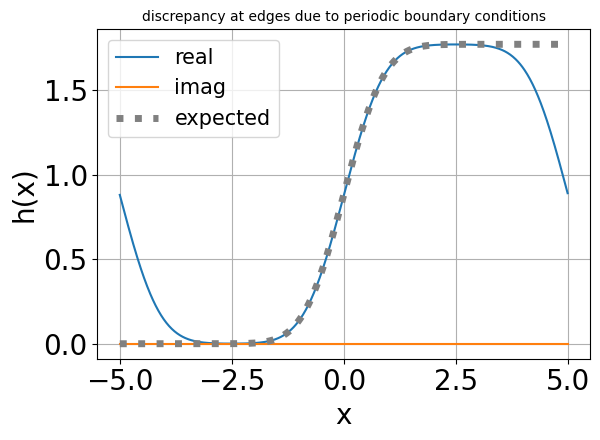

In [10]:
# we need to fix the norm and phase either in Fk or Gk
phase = np.exp(-1j*k*(-L/2))
norm = dx/np.sqrt(2*np.pi)

Fk = fft.fft(fx) * phase * norm
Gk = fft.fft(gx)
Hk = np.sqrt(2*np.pi) * Fk * Gk
hx = fft.ifft(Hk) 

# import error function from scipy
from scipy.special import erf
expected = (np.sqrt(np.pi)/2)*(1+erf(x))

plt.title('discrepancy at edges due to periodic boundary conditions', fontsize=10)
plt.plot(x, hx.real, label='real')
plt.plot(x, hx.imag, label='imag')
plt.plot(x, expected, ls=':', c='grey', lw=5, label='expected')
plt.legend(fontsize=15)
plt.xlabel('x')
plt.ylabel('h(x)')
plt.grid()

plt.tight_layout()
plt.show()